Epoch 1/100
1214/1214 [==============================] - 2s 1ms/step - loss: -529.6847 - accuracy: 0.0000e+00 - val_loss: -2042.1461 - val_accuracy: 0.0000e+00
Epoch 2/100
1214/1214 [==============================] - 1s 1ms/step - loss: -6620.9746 - accuracy: 0.0000e+00 - val_loss: -13147.3262 - val_accuracy: 0.0000e+00
Epoch 3/100
1214/1214 [==============================] - 1s 1ms/step - loss: -23652.7129 - accuracy: 0.0000e+00 - val_loss: -36606.6680 - val_accuracy: 0.0000e+00
Epoch 4/100
1214/1214 [==============================] - 1s 987us/step - loss: -53981.9453 - accuracy: 0.0000e+00 - val_loss: -74342.2109 - val_accuracy: 0.0000e+00
Epoch 5/100
1214/1214 [==============================] - 1s 996us/step - loss: -99325.9531 - accuracy: 0.0000e+00 - val_loss: -127902.1250 - val_accuracy: 0.0000e+00
Epoch 6/100
1214/1214 [==============================] - 1s 990us/step - loss: -161257.1875 - accuracy: 0.0000e+00 - val_loss: -199042.0938 - val_accuracy: 0.0000e+00
Epoch 7/100
1214/

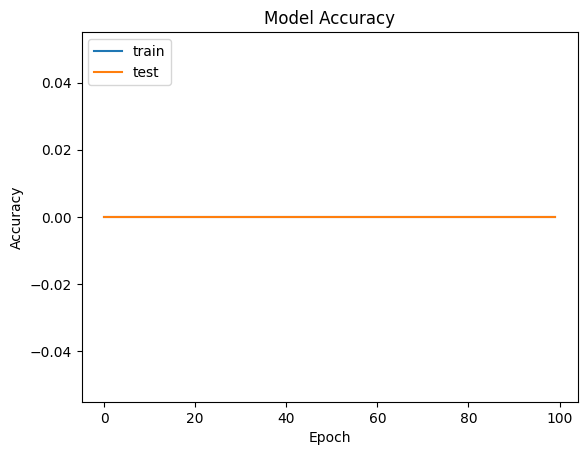

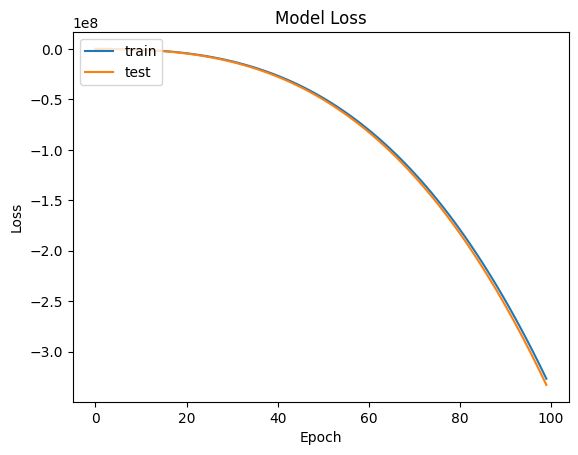

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the data from CSV file
data = pd.read_csv('C:\\Users\\PRADNYA\\Downloads\\Goldn.csv')

# Select the features and target variable
X = data[[ 'latitude', 'longitude', 'depth']]
y = data['mag']

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an ANN model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the testing set
score = model.evaluate(X_test, y_test)

# Print the accuracy score and loss of the model
print('Accuracy Score: ', score[1])
print('Loss: ', score[0])

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


C:\PYTHON 3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


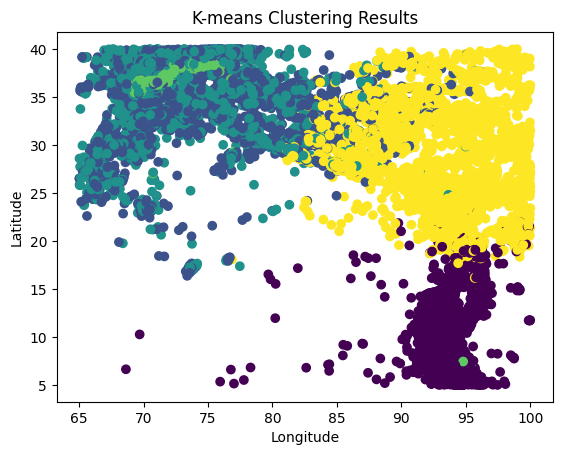

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the data from CSV file
data = pd.read_csv('C:\\Users\\PRADNYA\\Downloads\\Goldn.csv')

# Select the features
X = data[[ 'latitude', 'longitude', 'depth', 'mag']]

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply K-means clustering with k=5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

# Assign cluster labels to the data
labels = kmeans.labels_

# Add cluster labels to the data
data['cluster'] = labels

# Plot the data points colored by cluster labels
plt.scatter(data['longitude'], data['latitude'], c=data['cluster'], cmap='viridis')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-means Clustering Results')
plt.show()


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from mlxtend.plotting import plot_decision_regions

# Load the data from CSV file
data = pd.read_csv('C:\\Users\\PRADNYA\\Downloads\\Golden_excel.csv')

# Select the features and target variable
X = df.drop(['mag'], axis=1)
y = np.where(data['mag'] > 5, 1, 0)  # set threshold magnitude value to 5

# Scale the features using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the SVM model
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly')
svm_rbf = SVC(kernel='rbf')

# Train the SVM models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred_linear = svm_linear.predict(X_test)
y_pred_poly = svm_poly.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate the accuracy score and confusion matrix
acc_score_linear = accuracy_score(y_test, y_pred_linear)
conf_mat_linear = confusion_matrix(y_test, y_pred_linear)

acc_score_poly = accuracy_score(y_test, y_pred_poly)
conf_mat_poly = confusion_matrix(y_test, y_pred_poly)

acc_score_rbf = accuracy_score(y_test, y_pred_rbf)
conf_mat_rbf = confusion_matrix(y_test, y_pred_rbf)

print('Linear SVM:')
print('Accuracy Score: ', acc_score_linear)
print('Confusion Matrix: \n', conf_mat_linear)

print('\nPolynomial SVM:')
print('Accuracy Score: ', acc_score_poly)
print('Confusion Matrix: \n', conf_mat_poly)

print('\nRBF SVM:')
print('Accuracy Score: ', acc_score_rbf)
print('Confusion Matrix: \n', conf_mat_rbf)

# Plot the decision regions for the SVM models
plt.figure(figsize=(12, 8))

plot_decision_regions(X_test[:, :2], y_test, clf=svm_linear, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Linear SVM Decision Region')
plt.show()

plt.figure(figsize=(12, 8))
plot_decision_regions(X_test[:, :2], y_test, clf=svm_poly, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Polynomial SVM Decision Region')
plt.show()

plt.figure(figsize=(12, 8))
plot_decision_regions(X_test[:, :2], y_test, clf=svm_rbf, legend=2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('RBF SVM Decision Region')
plt.show()


KeyError: "['mag'] not found in axis"

Epoch 1/100
2219/2219 [==============================] - 4s 2ms/step - loss: 103219271303168.0000 - mean_absolute_error: 1647067.0000 - val_loss: 188.3142 - val_mean_absolute_error: 10.4923
Epoch 2/100
2219/2219 [==============================] - 3s 2ms/step - loss: 163.7265 - mean_absolute_error: 9.6470 - val_loss: 158.0022 - val_mean_absolute_error: 9.5393
Epoch 3/100
2219/2219 [==============================] - 3s 1ms/step - loss: 160.6535 - mean_absolute_error: 9.6094 - val_loss: 157.6298 - val_mean_absolute_error: 9.4877
Epoch 4/100
2219/2219 [==============================] - 3s 2ms/step - loss: 180.6165 - mean_absolute_error: 10.3057 - val_loss: 222.2460 - val_mean_absolute_error: 11.6827
Epoch 5/100
2219/2219 [==============================] - 4s 2ms/step - loss: 10812.4580 - mean_absolute_error: 39.5969 - val_loss: 33092.4102 - val_mean_absolute_error: 168.6665
Epoch 6/100
2219/2219 [==============================] - 4s 2ms/step - loss: 2653889536.0000 - mean_absolute_error: 1

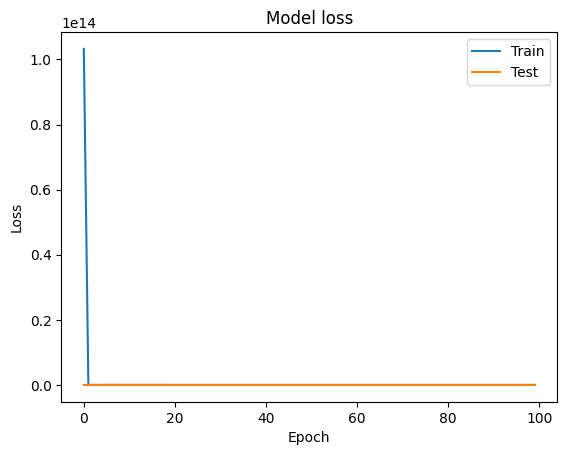

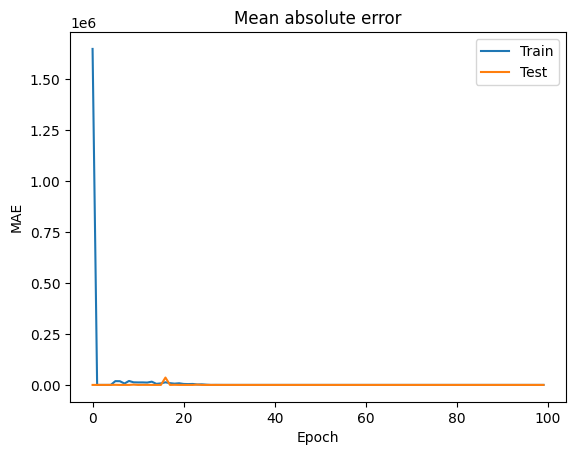

174/174 [==============================] - 0s 1ms/step - loss: 0.2554 - mean_absolute_error: 0.3768
Mean absolute error:  0.37675854563713074


In [21]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Convert categorical variable to numerical
# le = LabelEncoder()
# df['type'] = le.fit_transform(df['type'])

# Define features and target variable
X = df.drop(['magnitude'], axis=1)
y = df['magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model architecture
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the training and validation mean absolute error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean absolute error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Evaluate the model on the testing set
scores = model.evaluate(X_test, y_test)
print("Mean absolute error: ", scores[1])


Epoch 1/100
2219/2219 [==============================] - 5s 2ms/step - loss: 1.4670 - mean_absolute_error: 0.7687 - val_loss: 0.2556 - val_mean_absolute_error: 0.3759
Epoch 2/100
2219/2219 [==============================] - 4s 2ms/step - loss: 0.2511 - mean_absolute_error: 0.3764 - val_loss: 0.2560 - val_mean_absolute_error: 0.3759
Epoch 3/100
2219/2219 [==============================] - 4s 2ms/step - loss: 0.2514 - mean_absolute_error: 0.3770 - val_loss: 0.2560 - val_mean_absolute_error: 0.3759
Epoch 4/100
2219/2219 [==============================] - 4s 2ms/step - loss: 0.2517 - mean_absolute_error: 0.3768 - val_loss: 0.2554 - val_mean_absolute_error: 0.3780
Epoch 5/100
2219/2219 [==============================] - 4s 2ms/step - loss: 0.2513 - mean_absolute_error: 0.3769 - val_loss: 0.2567 - val_mean_absolute_error: 0.3809
Epoch 6/100
2219/2219 [==============================] - 4s 2ms/step - loss: 0.2516 - mean_absolute_error: 0.3770 - val_loss: 0.2554 - val_mean_absolute_error: 0.377

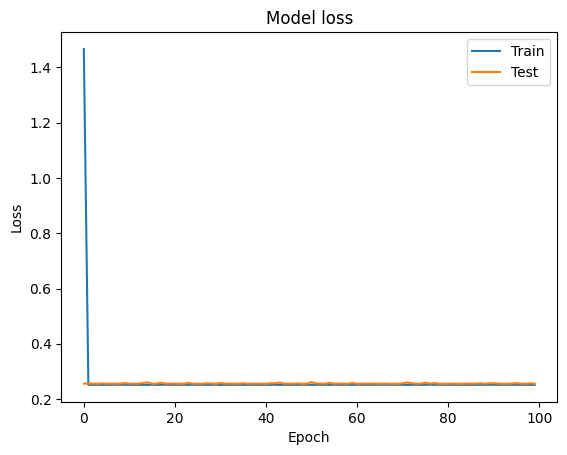

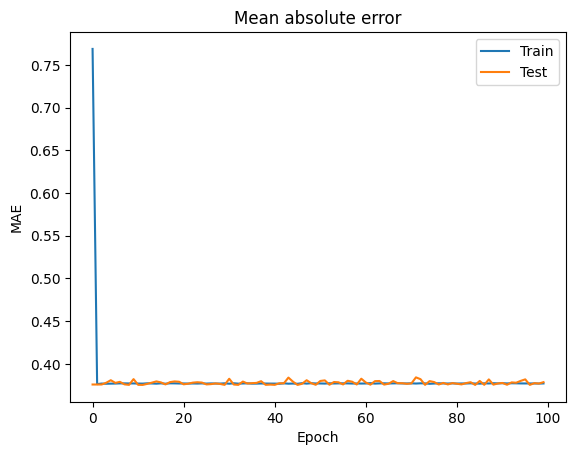

174/174 [==============================] - 0s 802us/step - loss: 0.2555 - mean_absolute_error: 0.3786
Mean absolute error:  0.3786430060863495


In [25]:
# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Add a new column with constant value 1
df['dummy'] = 1

# Define features and target variable
X = df.drop(['magnitude'], axis=1)
y = df['magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to fit the LSTM model
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Define the model architecture
model = Sequential()
model.add(LSTM(50, input_shape=(1, 5)))  # update input_shape to (1, 6)
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the training and validation mean absolute error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean absolute error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Evaluate the model on the testing set
scores = model.evaluate(X_test, y_test)
print("Mean absolute error: ", scores[1])


Epoch 1/100
2219/2219 [==============================] - 5s 2ms/step - loss: 1.0976 - mean_absolute_error: 0.6651 - val_loss: 0.2554 - val_mean_absolute_error: 0.3782
Epoch 2/100
2219/2219 [==============================] - 4s 2ms/step - loss: 0.2511 - mean_absolute_error: 0.3766 - val_loss: 0.2567 - val_mean_absolute_error: 0.3809
Epoch 3/100
2219/2219 [==============================] - 4s 2ms/step - loss: 0.2518 - mean_absolute_error: 0.3771 - val_loss: 0.2565 - val_mean_absolute_error: 0.3766
Epoch 4/100
2219/2219 [==============================] - 4s 2ms/step - loss: 0.2514 - mean_absolute_error: 0.3770 - val_loss: 0.2646 - val_mean_absolute_error: 0.3815
Epoch 5/100
2219/2219 [==============================] - 4s 2ms/step - loss: 0.2517 - mean_absolute_error: 0.3774 - val_loss: 0.2558 - val_mean_absolute_error: 0.3756
Epoch 6/100
2219/2219 [==============================] - 4s 2ms/step - loss: 0.2519 - mean_absolute_error: 0.3776 - val_loss: 0.2554 - val_mean_absolute_error: 0.377

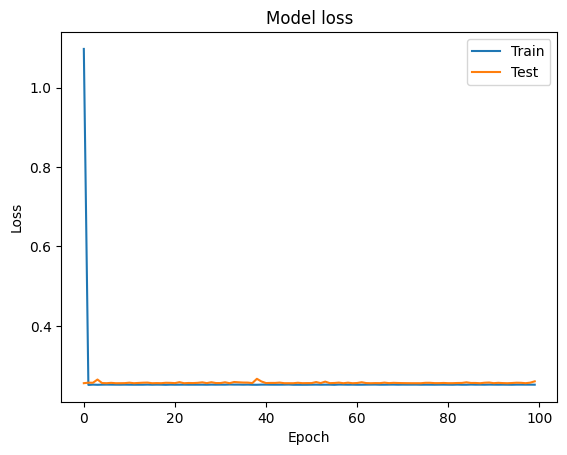

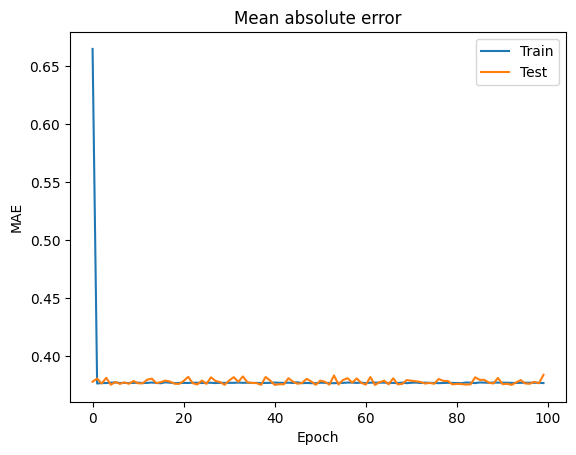

174/174 [==============================] - 0s 932us/step - loss: 0.2601 - mean_absolute_error: 0.3841
Mean absolute error:  0.3841400146484375


In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# # Convert categorical variable to numerical
# le = LabelEncoder()
# df['type'] = le.fit_transform(df['type'])

# Define features and target variable
X = df.drop(['magnitude'], axis=1)
y = df['magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to fit the LSTM model
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Define the model architecture
model = Sequential()
model.add(LSTM(50, input_shape=(1, 4)))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the training and validation mean absolute error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean absolute error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Evaluate the model on the testing set
scores = model.evaluate(X_test, y_test)
print("Mean absolute error: ", scores[1])


Mean Absolute Error (MAE): 0.4401658554173427
Mean Squared Error (MSE): 0.3608761492698756
Coefficient of Determination (R2 score): -0.4132696867690868


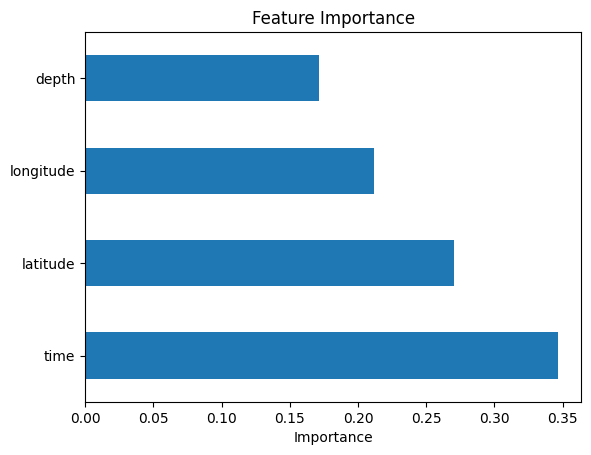

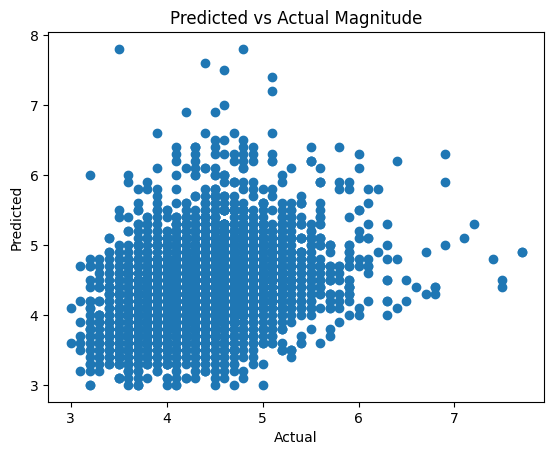

In [27]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Define features and target variable
X = df[['time', 'latitude', 'longitude', 'depth']]
y = df['magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Compute evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R2 score):", r2)

# Visualize feature importance
feat_importance = pd.Series(model.feature_importances_, index=X.columns)
feat_importance.plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

# Visualize predicted vs actual values
plt.scatter(y_test, y_pred)
plt.title('Predicted vs Actual Magnitude')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


# #linear regression 

Coefficients: 
 [-2.58371562e-10 -6.32836058e-03  3.60097062e-03 -4.54419774e-04]
Mean squared error: 0.23
Variance score: 0.08


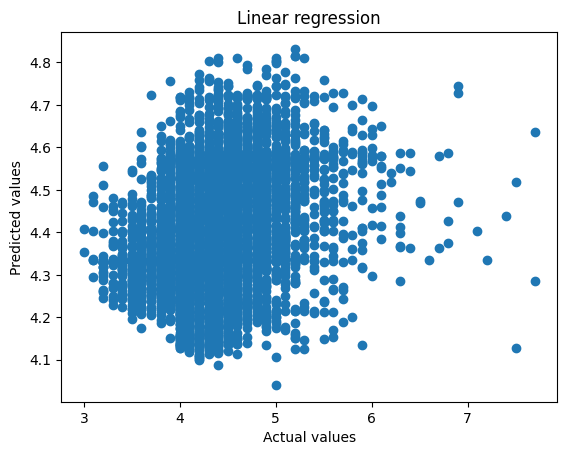

Coefficients: 
 [-5.14641471e+06 -6.91867262e+05 -3.58669347e+05 -1.35919609e+08]
Mean squared error: 120021178822101536.00
Variance score: 0.05


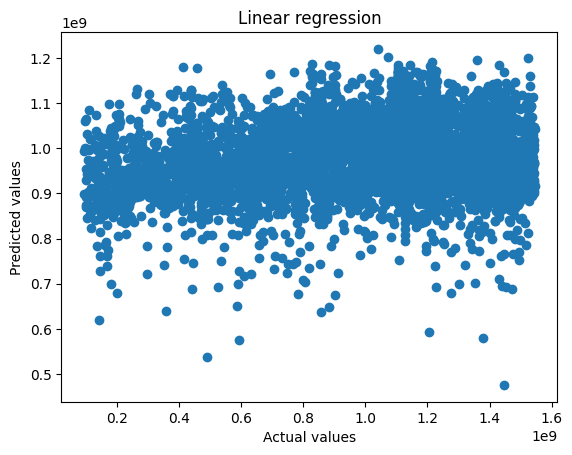

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Define features and target variable
X = df[[ 'latitude', 'longitude', 'depth','magnitude']]
y = df['time']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object
reg = LinearRegression()

# Train the model using the training sets
reg.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = reg.predict(X_test)

# Print the coefficients
print('Coefficients: \n', reg.coef_)

# Print the mean squared error and variance score (accuracy measures)
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

# Plot the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear regression')
plt.show()


# SVR

Mean squared error:  0.21879504012809967
Mean absolute error:  0.3441169989381055
R-squared:  0.1431509163072272


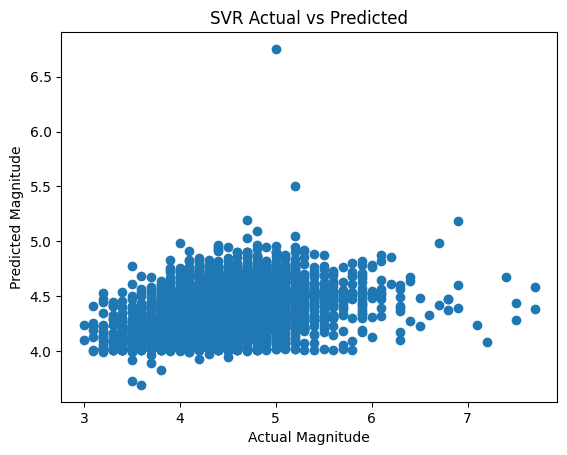

In [30]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Define features and target variable
X = df.drop(['magnitude'], axis=1)
y = df['magnitude']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)

# Train the model
svr.fit(X_train, y_train)

# Predict the target variable for testing data
y_pred = svr.predict(X_test)

# Evaluate the model on the testing set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R-squared: ", r2)

# Plot the actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Magnitude')
plt.ylabel('Predicted Magnitude')
plt.title('SVR Actual vs Predicted')
plt.show()


# polynomai; regression

Training RMSE: 0.4717883278009125
Testing RMSE: 0.47406118949313464


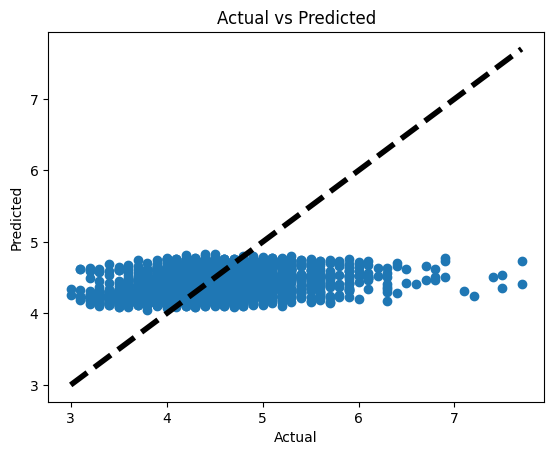

In [32]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Define features and target variable
X = df.drop(['magnitude'], axis=1)
y = df['magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict the target values
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Print the accuracy measures
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))

# Plot the predicted vs actual values for the testing set
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


# random forest

Mean squared error:  0.1906321123329928
Mean absolute error:  0.32529006670272226
R2 score:  0.2534430822595023


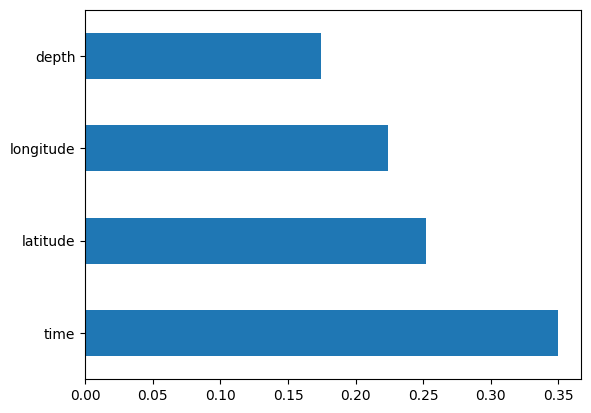

In [35]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Define features and target variable
X = df[['time', 'latitude', 'longitude', 'depth']]
y = df['magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
rf = RandomForestRegressor(n_estimators=150, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict the magnitude using testing set
y_pred = rf.predict(X_test)

# Calculate accuracy measures
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R2 score: ", r2)

# Plot the feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances.plot(kind='barh')
plt.show()


# adaboost 

Mean squared error:  0.23684166673646703
Mean absolute error:  0.37717543567332873
R2 score:  0.07247639158275543


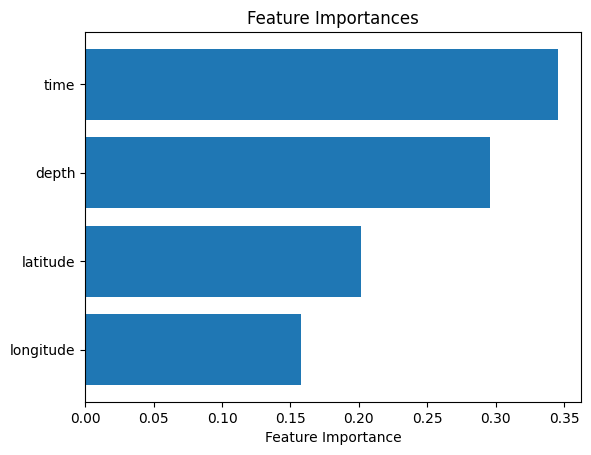

In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Define features and target variable
X = df.drop(['magnitude'], axis=1)
y = df['magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model architecture
model = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean squared error: ", mse)
print("Mean absolute error: ", mae)
print("R2 score: ", r2)

# Plot the feature importances
feature_importances = model.feature_importances_
feature_names = X.columns
sorted_idx = feature_importances.argsort()
plt.barh(feature_names[sorted_idx], feature_importances[sorted_idx])
plt.xlabel("Feature Importance")
plt.title("Feature Importances")
plt.show()


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree

# load the data
data = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# split the data into features and target
X = data[['time', 'latitude', 'longitude', 'depth']]
y = data['magnitude']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and fit the decision tree regression model
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# make predictions on the test data
y_pred = tree_reg.predict(X_test)

# calculate the accuracy measures
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# print the accuracy measures
print('Mean squared error: ', mse)
print('Mean absolute error: ', mae)
print('R2 score: ', r2)

# plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(tree_reg, filled=True)
plt.show()


Mean squared error:  0.36491617090319095
Mean absolute error:  0.44169821525148734
R2 score:  -0.4290912923803405



KeyboardInterrupt



Training RMSE: 0.4717883278009125
Testing RMSE: 0.47406118949313464
R2 score: 0.1198926099241715


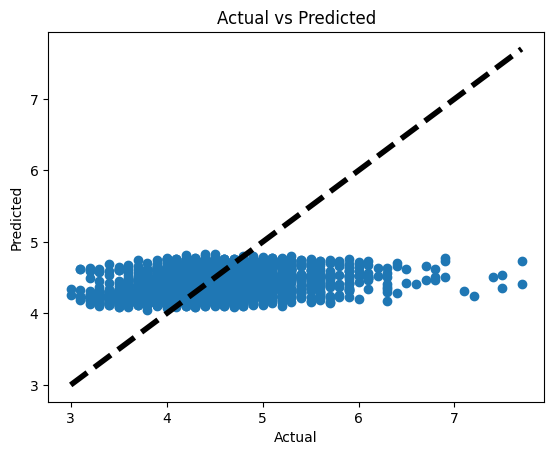

In [38]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Define features and target variable
X = df.drop(['magnitude'], axis=1)
y = df['magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict the target values
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Print the accuracy measures
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("R2 score:", r2_score(y_test, y_pred_test))

# Plot the predicted vs actual values for the testing set
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


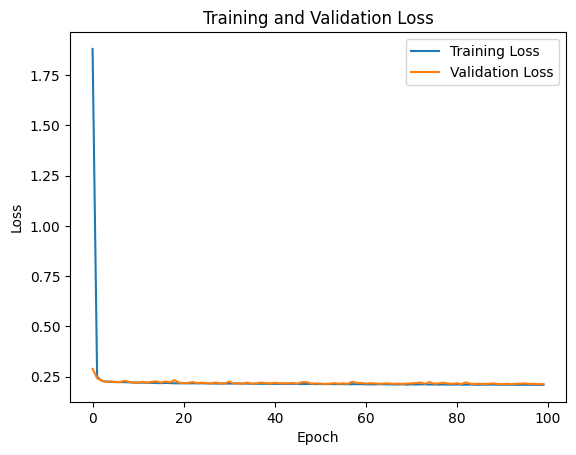

174/174 [==============================] - 0s 2ms/step
Training RMSE: 0.4536287926834554
Testing RMSE: 0.4613739512874366
Training R2 score: 0.17930014179964837
Testing R2 score: 0.16637063206610891


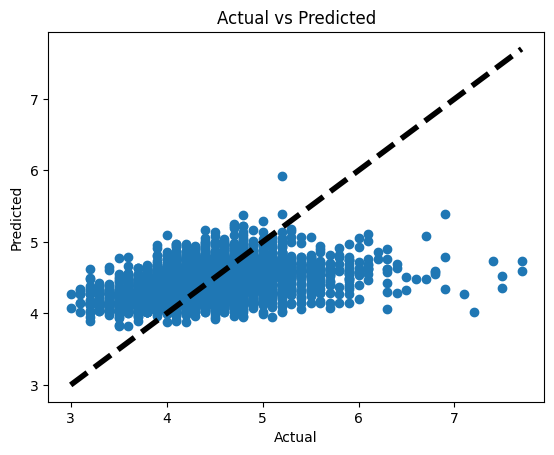

In [39]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Define features and target variable
X = df.drop(['magnitude'], axis=1)
y = df['magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=100, verbose=0)

# Plot the training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

# Predict the target values
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

# Print the accuracy measures
print("Training RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("Testing RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_test)))
print("Training R2 score:", r2_score(y_train, y_pred_train))
print("Testing R2 score:", r2_score(y_test, y_pred_test))

# Plot the predicted vs actual values for the testing set
plt.scatter(y_test, y_pred_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()


Epoch 1/100
2219/2219 [==============================] - 5s 2ms/step - loss: 1.5322 - mean_absolute_error: 0.7708 - val_loss: 0.2554 - val_mean_absolute_error: 0.3768
Epoch 2/100
2219/2219 [==============================] - 3s 1ms/step - loss: 0.2511 - mean_absolute_error: 0.3766 - val_loss: 0.2561 - val_mean_absolute_error: 0.3800
Epoch 3/100
2219/2219 [==============================] - 3s 1ms/step - loss: 0.2512 - mean_absolute_error: 0.3767 - val_loss: 0.2557 - val_mean_absolute_error: 0.3755
Epoch 4/100
2219/2219 [==============================] - 3s 1ms/step - loss: 0.2517 - mean_absolute_error: 0.3772 - val_loss: 0.2560 - val_mean_absolute_error: 0.3759
Epoch 5/100
2219/2219 [==============================] - 3s 1ms/step - loss: 0.2517 - mean_absolute_error: 0.3773 - val_loss: 0.2554 - val_mean_absolute_error: 0.3782
Epoch 6/100
2219/2219 [==============================] - 3s 1ms/step - loss: 0.2516 - mean_absolute_error: 0.3770 - val_loss: 0.2554 - val_mean_absolute_error: 0.377

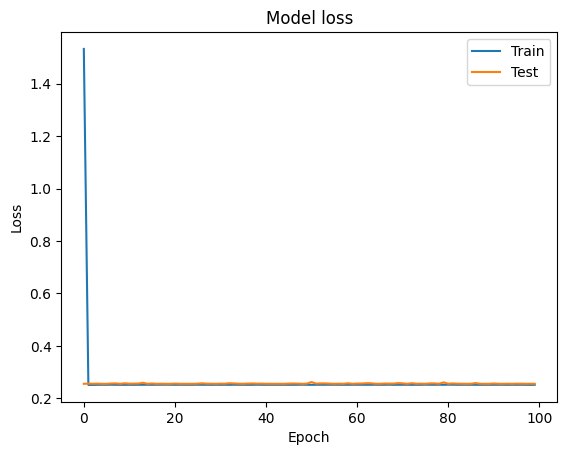

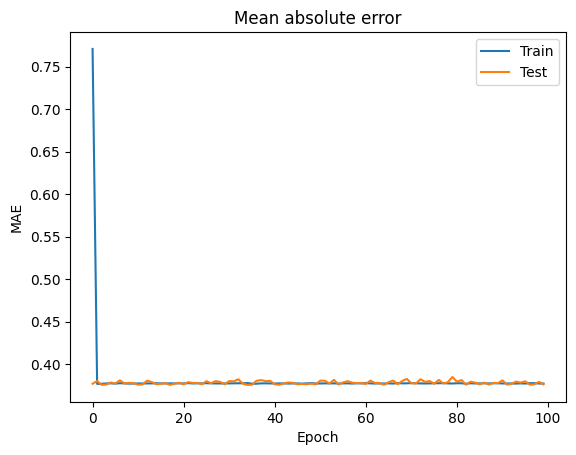

174/174 [==============================] - 0s 770us/step - loss: 0.2555 - mean_absolute_error: 0.3761
Mean absolute error:  0.3760923147201538


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import r2_score

# Load the dataset
df = pd.read_csv('C:\\Users\\PRADNYA\\Desktop\\Golden_new.csv')

# Define features and target variable
X = df.drop(['magnitude'], axis=1)
y = df['magnitude']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data to fit the LSTM model
X_train = np.reshape(X_train.values, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test.values, (X_test.shape[0], 1, X_test.shape[1]))

# Define the model architecture
model = Sequential()
model.add(LSTM(50, input_shape=(1, 4)))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test))

# Predict the target values for the testing set
y_pred = model.predict(X_test)

# Calculate the R2 score for the testing set
r2score = r2_score(y_test, y_pred)
print("R2 score:", r2score)

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Plot the training and validation mean absolute error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('Mean absolute error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# Evaluate the model on the testing set
scores = model.evaluate(X_test, y_test)
print("Mean absolute error: ", scores[1])
